In [4]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('seaborn-notebook')

### Create numpy arrays from the data files

In [5]:
# change this to your path to the data directory
%cd /Users/kreutzer/Dataset/BalanceExperiment 

/Users/kreutzer/Dataset/BalanceExperiment


In [18]:
# put your group number here
group_num = 0

OO_data = [
    'GROUP{0}-E1-12-oo_bb0.csv'.format(group_num),
    'GROUP{0}-E1-12-oo_bb1.csv'.format(group_num),
    'GROUP{0}-E1-34-oo_bb0.csv'.format(group_num),
    'GROUP{0}-E1-34-oo_bb1.csv'.format(group_num)
]

BO_data = [
    'GROUP{0}-E1-12-bo_bb0.csv'.format(group_num),
    'GROUP{0}-E1-12-bo_bb1.csv'.format(group_num),
    'GROUP{0}-E1-34-bo_bb0.csv'.format(group_num),
    'GROUP{0}-E1-34-bo_bb1.csv'.format(group_num)
]

OB_data = [
    'GROUP{0}-E1-12-ob_bb0.csv'.format(group_num),
    'GROUP{0}-E1-12-ob_bb1.csv'.format(group_num),
    'GROUP{0}-E1-34-ob_bb0.csv'.format(group_num),
    'GROUP{0}-E1-34-ob_bb1.csv'.format(group_num)
    
]

BB_data = [
    'GROUP{0}-E1-12-bb_bb0.csv'.format(group_num),
    'GROUP{0}-E1-12-bb_bb1.csv'.format(group_num),
    'GROUP{0}-E1-34-bb_bb0.csv'.format(group_num),
    'GROUP{0}-E1-34-bb_bb1.csv'.format(group_num)
    
]

In [22]:
# load the collected center of pressure data from the data files
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    t = np.where(~np.isclose(data[:,0], 0))[0]
    data = data[t[0]:][:,[0,1,2]]
    return data

### Data preprocessing

In [40]:
# load and preprocess the paired data bb0 and bb1 for each condition OO, BO, OB, BB
# here filtering and detrending is applied as preprocessing, in line with Okazaki et al 
bb0_oo_y = load_data(OO_data[0])
bb1_oo_y = load_data(OO_data[1])

bb0_bo_y = load_data(BO_data[0])
bb1_bo_y = load_data(BO_data[1])

bb0_ob_y = load_data(OB_data[0])
bb1_ob_y = load_data(OB_data[1])

bb0_bb_y = load_data(BB_data[0])
bb1_bb_y = load_data(BB_data[1])

# Take the y-axis(anterior-posterior) from the data
bb0_oo_y = bb0_oo_y[:,2]
bb1_oo_y = -bb1_oo_y[:,2]

bb0_bo_y = bb0_bo_y[:,2]
bb1_bo_y = -bb1_bo_y[:,2]

bb0_ob_y = bb0_ob_y[:,2]
bb1_ob_y = -bb1_ob_y[:,2]

bb0_bb_y = bb0_bb_y[:,2]
bb1_bb_y = -bb1_bb_y[:,2]

# take the moving-window average of the data (filtering)
n = 100
w = np.ones(n) / n
bb0_oo_y_ma = np.convolve(w, bb0_oo_y, mode='valid')
bb1_oo_y_ma = np.convolve(w, bb1_oo_y, mode='valid')

bb0_bo_y_ma = np.convolve(w, bb0_bo_y, mode='valid')
bb1_bo_y_ma = np.convolve(w, bb1_bo_y, mode='valid')

bb0_ob_y_ma = np.convolve(w, bb0_ob_y, mode='valid')
bb1_ob_y_ma = np.convolve(w, bb1_ob_y, mode='valid')

bb0_bb_y_ma = np.convolve(w, bb0_bb_y, mode='valid')
bb1_bb_y_ma = np.convolve(w, bb1_bb_y, mode='valid')

# translate the data with linear least-squres (detrending)
detrend = signal.detrend
bb0_oo_y_ma_detrended = detrend(bb0_oo_y_ma)
bb1_oo_y_ma_detrended = detrend(bb1_oo_y_ma)

bb0_bo_y_ma_detrended = detrend(bb0_bo_y_ma)
bb1_bo_y_ma_detrended = detrend(bb1_bo_y_ma)

bb0_ob_y_ma_detrended = detrend(bb0_ob_y_ma)
bb1_ob_y_ma_detrended = detrend(bb1_ob_y_ma)

bb0_bb_y_ma_detrended = detrend(bb0_bb_y_ma)
bb1_bb_y_ma_detrended = detrend(bb1_bb_y_ma)

In [50]:
# load and preprocess the paired data bb0 and bb1 for each condition OO, BO, OB, BB
# here filtering and detrending is applied as preprocessing, in line with Okazaki et al 
bb0_oo_x = load_data(OO_data[0])
bb1_oo_x = load_data(OO_data[1])

bb0_bo_x = load_data(BO_data[0])
bb1_bo_x = load_data(BO_data[1])

bb0_ob_x = load_data(OB_data[0])
bb1_ob_x = load_data(OB_data[1])

bb0_bb_x = load_data(BB_data[0])
bb1_bb_x = load_data(BB_data[1])

# Take the x-axis(anterior-posterior) from the data
bb0_oo_x = bb0_oo_x[:,1]
bb1_oo_x = -bb1_oo_x[:,1]

bb0_bo_x = bb0_bo_x[:,1]
bb1_bo_x = -bb1_bo_x[:,1]

bb0_ob_x = bb0_ob_x[:,1]
bb1_ob_x = -bb1_ob_x[:,1]

bb0_bb_x = bb0_bb_x[:,1]
bb1_bb_x = -bb1_bb_x[:,1]

# take the moving-window average of the data (filtering)
n = 100
w = np.ones(n) / n
bb0_oo_x_ma = np.convolve(w, bb0_oo_x, mode='valid')
bb1_oo_x_ma = np.convolve(w, bb1_oo_x, mode='valid')

bb0_bo_x_ma = np.convolve(w, bb0_bo_x, mode='valid')
bb1_bo_x_ma = np.convolve(w, bb1_bo_x, mode='valid')

bb0_ob_x_ma = np.convolve(w, bb0_ob_x, mode='valid')
bb1_ob_x_ma = np.convolve(w, bb1_ob_x, mode='valid')

bb0_bb_x_ma = np.convolve(w, bb0_bb_x, mode='valid')
bb1_bb_x_ma = np.convolve(w, bb1_bb_x, mode='valid')

# translate the data with linear least-squres (detrending)
detrend = signal.detrend
bb0_oo_x_ma_detrended = detrend(bb0_oo_x_ma)
bb1_oo_x_ma_detrended = detrend(bb1_oo_x_ma)

bb0_bo_x_ma_detrended = detrend(bb0_bo_x_ma)
bb1_bo_x_ma_detrended = detrend(bb1_bo_x_ma)

bb0_ob_x_ma_detrended = detrend(bb0_ob_x_ma)
bb1_ob_x_ma_detrended = detrend(bb1_ob_x_ma)

bb0_bb_x_ma_detrended = detrend(bb0_bb_x_ma)
bb1_bb_x_ma_detrended = detrend(bb1_bb_x_ma)

### Cross correlation analysis examples（sin and cos waves）

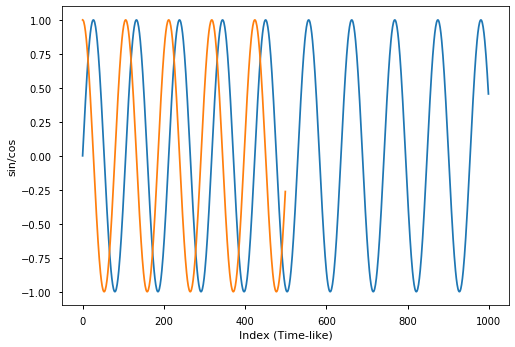

In [6]:
t = np.linspace(0, np.pi * 3, 1000)
sin_x = np.sin(2 * np.pi * t)
cos_x = np.cos(2 * np.pi * t)[:500] # only first half

plt.plot(sin_x, label='sin')
plt.plot(cos_x, label='cos')
plt.xlabel('Index (Time-like)')
plt.ylabel('sin/cos')
plt.show()

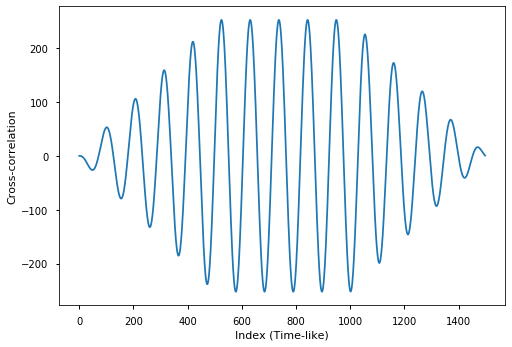

In [12]:
# cross correlation of sin and cos
xcor = signal.correlate(sin_x, cos_x, 'full')

plt.plot(xcor)
plt.xlabel('Index (Time-like)')
plt.ylabel('Cross-correlation')
plt.show()

In [8]:
# lag
lag = len(cos_x) - 1 - np.argmax(xcor) # lag of the maximum cross correlation（unit is index number）

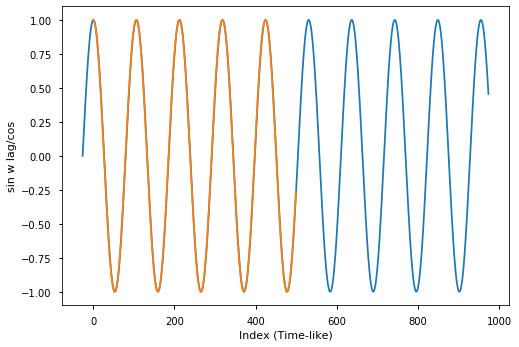

In [9]:
plt.plot(np.arange(len(sin_x)) + lag, sin_x)
plt.plot(np.arange(len(cos_x)), cos_x)
plt.xlabel('Index (Time-like)')
plt.ylabel('sin w lag/cos')
plt.show()

### Analyze our CoP data

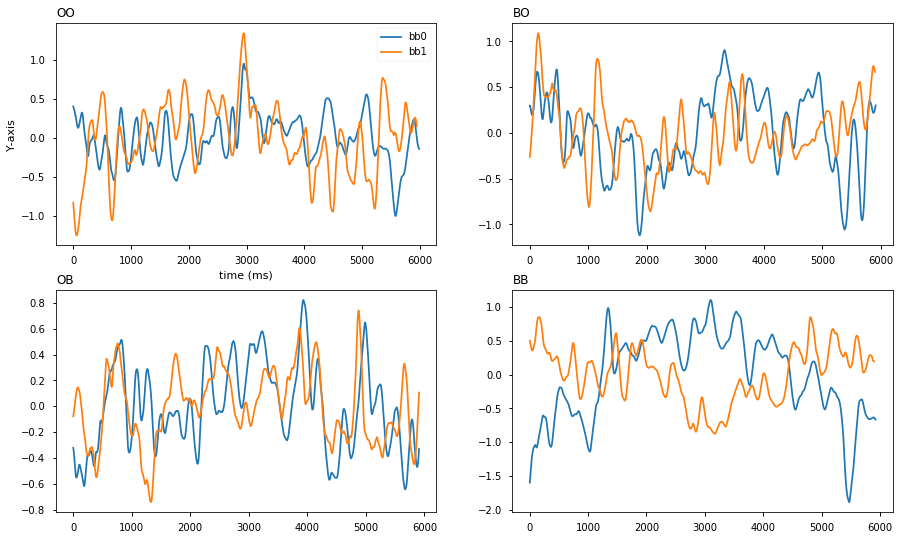

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

ax[0, 0].plot(bb0_oo_y_ma_detrended)
ax[0, 0].plot(bb1_oo_y_ma_detrended)
ax[0, 0].set_xlabel('time (ms)')
ax[0, 0].set_ylabel('Y-axis')
ax[0, 0].set_title('OO', loc='left')
ax[0, 0].legend(['bb0', 'bb1'])

ax[0, 1].plot(bb0_bo_y_ma_detrended)
ax[0, 1].plot(bb1_bo_y_ma_detrended)
ax[0, 1].set_title('BO', loc='left')

ax[1, 0].plot(bb0_ob_y_ma_detrended)
ax[1, 0].plot(bb1_ob_y_ma_detrended)
ax[1, 0].set_title('OB', loc='left')

ax[1, 1].plot(bb0_bb_y_ma_detrended)
ax[1, 1].plot(bb1_bb_y_ma_detrended)
ax[1, 1].set_title('BB', loc='left')

plt.show()

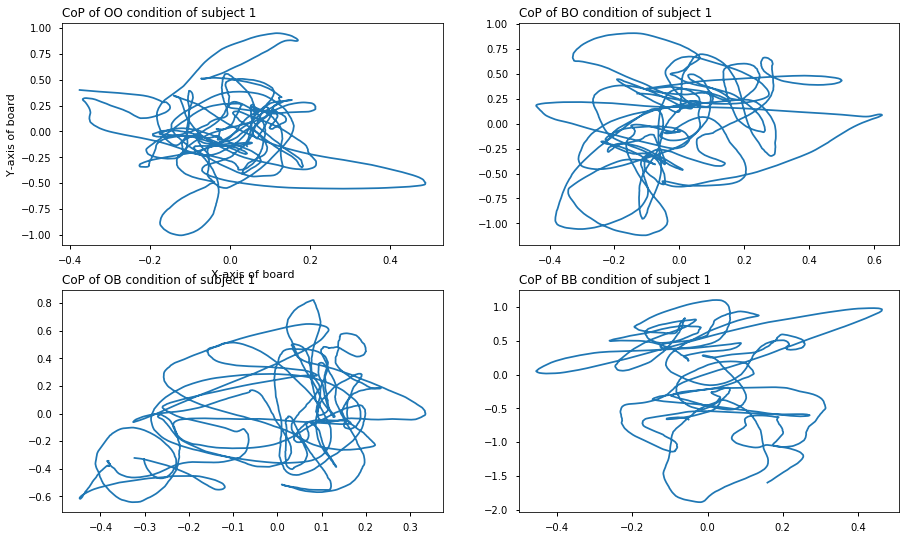

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

ax[0, 0].plot(bb0_oo_x_ma_detrended, bb0_oo_y_ma_detrended)
ax[0, 0].set_xlabel('X-axis of board')
ax[0, 0].set_ylabel('Y-axis of board')
ax[0, 0].set_title('CoP of OO condition of subject 1', loc='left')

ax[0, 1].plot(bb0_bo_x_ma_detrended, bb0_bo_y_ma_detrended)
ax[0, 1].set_title('CoP of BO condition of subject 1', loc='left')

ax[1, 0].plot(bb0_ob_x_ma_detrended, bb0_ob_y_ma_detrended)
ax[1, 0].set_title('CoP of OB condition of subject 1', loc='left')

ax[1, 1].plot(bb0_bb_x_ma_detrended, bb0_bb_y_ma_detrended)
ax[1, 1].set_title('CoP of BB condition of subject 1', loc='left')

plt.show()
# plt.savefig('results/torii_kato_result_detrended.png')

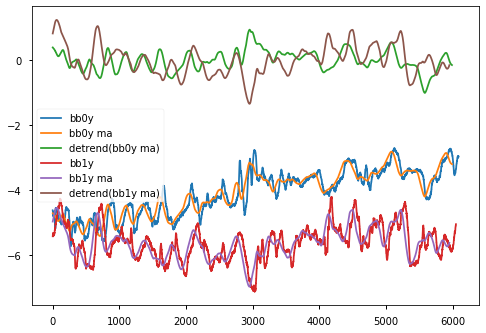

In [54]:
plt.plot(bb0y, label='bb0y')
plt.plot(bb0y_ma, label='bb0y ma')
plt.plot(detrend(bb0y_ma), label='detrend(bb0y ma)')
plt.plot(bb1y, label='bb1y')
plt.plot(bb1y_ma, label='bb1y ma')
plt.plot(detrend(bb1y_ma), label='detrend(bb1y ma)')
plt.legend()
plt.show()

### Average of cross-correlation data of group 0, 2, 4

In [56]:
%cd /Users/kreutzer/Dataset/BalanceExperiment/

/Users/kreutzer/Dataset/BalanceExperiment


In [82]:
oocorr, obcorr, bocorr, bbcorr = [], [], [], []
xcorr_for_conditions = [oocorr, obcorr, bocorr, bbcorr]

for group in ['0', '2', '4']:
    for kind, xcorr_condition in zip(['OO', 'BO', 'OB', 'BB'], xcorr_for_conditions):
        if group == '4': 
            subject_names = ['56', '78'] 
        else:
            subject_names = ['12', '34']
        for subject in subject_names:
            bb0 = np.loadtxt('GROUP{2}-E1-{0}-{1}_bb0.csv'.format(subject, kind, group), delimiter=',', skiprows=1)
            bb1 = np.loadtxt('GROUP{2}-E1-{0}-{1}_bb1.csv'.format(subject, kind, group), delimiter=',', skiprows=1)

            t = np.where(~np.isclose(bb0[:,0], 0))[0]
            bb0 = bb0[t[0]:][:,[0,1,2]]
#             print('bb0', t[0], bb0[0], len(bb0))

            t = np.where(~np.isclose(bb1[:,0], 0))[0]
            bb1 = bb1[t[0]:][:,[0,1,2]]
#             print('bb1', t[0], bb1[0], len(bb1))

            bb0y = bb0[:,2]
            bb1y = bb1[:,2]

            n = 100
            w = np.ones(n) / n
            bb0y_ma = np.convolve(w, bb0y, mode='valid')
            bb1y_ma = np.convolve(w, bb1y, mode='valid')

            detrend = signal.detrend
            xcorr = signal.correlate(detrend(bb0y_ma), detrend(bb1y_ma))
            center = len(bb1y_ma) - 1
            xcorr_condition.append(xcorr[center-1000:center+1000])

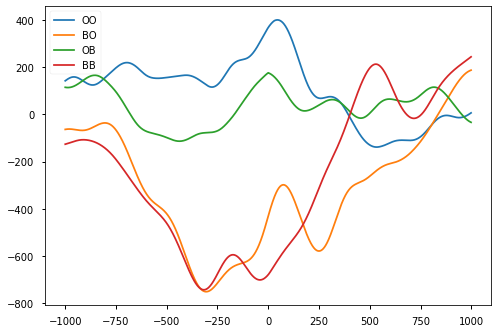

In [95]:
t = np.arange(-1000, 1000)
plt.plot(t, np.mean(xcorr_for_conditions[0], axis=0))
plt.plot(t, np.mean(xcorr_for_conditions[1], axis=0))
plt.plot(t, np.mean(xcorr_for_conditions[2], axis=0))
plt.plot(t, np.mean(xcorr_for_conditions[3], axis=0))
plt.legend(['OO', 'BO', 'OB', 'BB'])
plt.show()

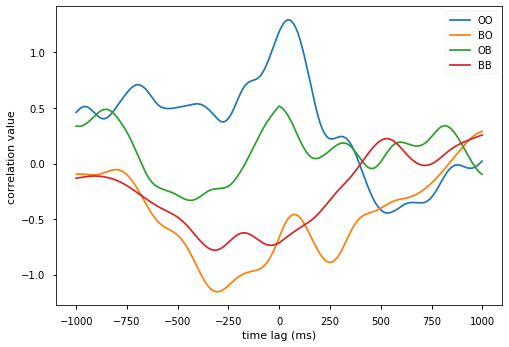

In [96]:
t = np.arange(-1000, 1000)
plt.plot(t, np.mean(xcorr_for_conditions[0], axis=0)/np.std(xcorr_for_conditions[0]))
plt.plot(t, np.mean(xcorr_for_conditions[1], axis=0)/np.std(xcorr_for_conditions[1]))
plt.plot(t, np.mean(xcorr_for_conditions[2], axis=0)/np.std(xcorr_for_conditions[2]))
plt.plot(t, np.mean(xcorr_for_conditions[3], axis=0)/np.std(xcorr_for_conditions[3]))
plt.xlabel('time lag (ms)')
plt.ylabel('correlation value')
plt.legend(['OO', 'BO', 'OB', 'BB'])
plt.show()

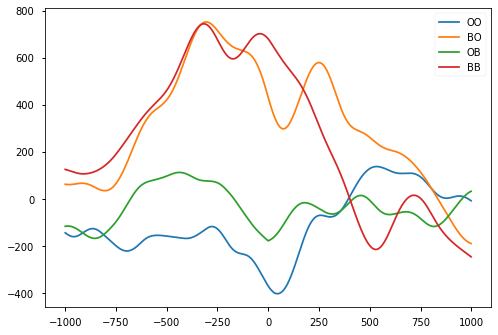

In [71]:
t = np.arange(-1000, 1000)
plt.plot(t, np.mean(xcorr_for_conditions[0], axis=0))
plt.plot(t, np.mean(xcorr_for_conditions[1], axis=0))
plt.plot(t, np.mean(xcorr_for_conditions[2], axis=0))
plt.plot(t, np.mean(xcorr_for_conditions[3], axis=0))
plt.legend(['OO', 'BO', 'OB', 'BB'])
plt.show()

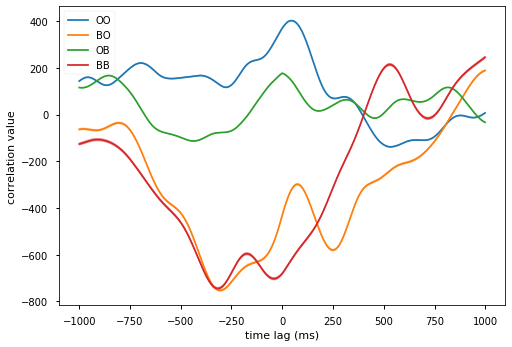

In [103]:
t = np.arange(-1000, 1000)
# sem_0 = np.std(xcorr_for_conditions[0], axis=0)/np.sqrt(len(xcorr_for_conditions[0]))
# sem_1 = np.std(xcorr_for_conditions[1], axis=0)/np.sqrt(len(xcorr_for_conditions[1]))
# sem_2 = np.std(xcorr_for_conditions[2], axis=0)/np.sqrt(len(xcorr_for_conditions[2]))
# sem_3 = np.std(xcorr_for_conditions[3], axis=0)/np.sqrt(len(xcorr_for_conditions[3]))

mean_data_0 = np.mean(xcorr_for_conditions[0], axis=0)
mean_data_1 = np.mean(xcorr_for_conditions[1], axis=0)
mean_data_2 = np.mean(xcorr_for_conditions[2], axis=0)
mean_data_3 = np.mean(xcorr_for_conditions[3], axis=0)

sem_0 = sem(mean_data_0)
sem_1 = sem(mean_data_1)
sem_2 = sem(mean_data_2)
sem_3 = sem(mean_data_3)

plt.plot(t, mean_data_0)
plt.fill_between(t, mean_data_0 - sem_0, mean_data_0 + sem_0, alpha=0.5)
plt.plot(t, mean_data_1)
plt.fill_between(t, mean_data_1 - sem_1, mean_data_1 + sem_1, alpha=0.5)
plt.plot(t, mean_data_2)
plt.fill_between(t, mean_data_2 - sem_2, mean_data_2 + sem_2, alpha=0.5)
plt.plot(t, mean_data_3)
plt.fill_between(t, mean_data_3 - sem_3, mean_data_3 + sem_3, alpha=0.5)

plt.xlabel('time lag (ms)')
plt.ylabel('correlation value')
plt.legend(['OO', 'BO', 'OB', 'BB'])
plt.show()